In [1]:
import pandas as pd
pd.options.display.max_colwidth = 20
pd.options.display.max_rows = 4

In [3]:
# df = pd.read_feather("s3://aq-dl/FinancialStatements/dataset.feather")
df = pd.read_feather("/mnt/aq_disk/data/FinancialStatements/interim/dataset.feather")
df

,cia_id,cia_nome,doc_id,doc_arq,doc_tp,doc_ver,doc_env,doc_ref,per_ini,per_fim,per_ref,dem_tp,conta_id,conta_fixa,conta_desc,conta_valor
0,3,CIA MODELO,54947,0000032016033130...,ITR,1,2016-04-02 12:04:12,2016-03-31,2016-01-01,2016-03-31,0,IND,3.01,True,Receita de Venda...,100000000.0
1,3,CIA MODELO,54947,0000032016033130...,ITR,1,2016-04-02 12:04:12,2016-03-31,2016-01-01,2016-03-31,0,IND,3.02,True,Custo dos Bens e...,-10000000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10655992,26310,CIA. SECURITIZAD...,108527,0263102021063030...,ITR,1,2021-10-08 15:53:04,2021-06-30,2021-01-01,2021-06-30,0,IND,9.01.03,True,Total de Ações (...,5000.0
10655993,26310,CIA. SECURITIZAD...,108527,0263102021063030...,ITR,1,2021-10-08 15:53:04,2021-06-30,2021-01-01,2021-06-30,0,CON,9.01.03,True,Total de Ações (...,5000.0


In [4]:
df.query('doc_tp == "DFP"', inplace=True)
df

,cia_id,cia_nome,doc_id,doc_arq,doc_tp,doc_ver,doc_env,doc_ref,per_ini,per_fim,per_ref,dem_tp,conta_id,conta_fixa,conta_desc,conta_valor
183,94,PANATLANTICA S.A.,6094,0000942010123140...,DFP,1,2011-03-31 10:16:48,2010-12-31,2008-01-01,2008-12-31,-2,IND,1,True,Ativo Total,184750000.0
184,94,PANATLANTICA S.A.,6094,0000942010123140...,DFP,1,2011-03-31 10:16:48,2010-12-31,2008-01-01,2008-12-31,-2,CON,1,True,Ativo Total,204561000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10655956,24600,BANCO BMG S/A,112039,0246002021123140...,DFP,1,2022-02-17 18:31:34,2021-12-31,2021-01-01,2021-12-31,0,IND,9.02.03,True,Total de Ações (...,51107.0
10655957,24600,BANCO BMG S/A,112039,0246002021123140...,DFP,1,2022-02-17 18:31:34,2021-12-31,2021-01-01,2021-12-31,0,CON,9.02.03,True,Total de Ações (...,51107.0


In [5]:
# Núm. de DFPs
df.doc_id.nunique()

10498

<AxesSubplot:>

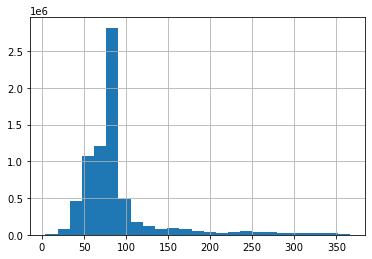

In [6]:
# The 100th day seems to be an interesting cut-off day, close to most publications, not letting the information get too out of date.
df.doc_env.dt.dayofyear.hist(bins=25)